<a href="https://colab.research.google.com/github/baiju012/Machine-Learning/blob/main/PredictingFraudulentClaims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install --upgrade pixiedust

Requirement already up-to-date: pixiedust in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.1.18)


In [ ]:
import pixiedust
import sklearn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
import brunel
from watson_machine_learning_client import WatsonMachineLearningAPIClient

Pixiedust database opened successfully


In [ ]:
raw_df = pixiedust.sampleData('https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv')

Downloaded 463947 bytes
Creating pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'



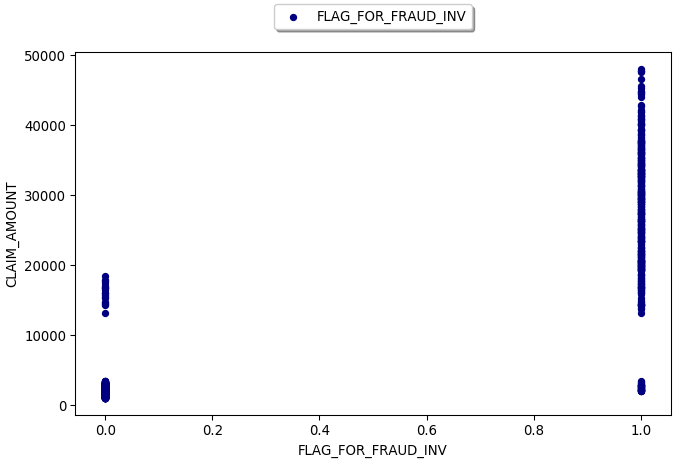

In [ ]:
display(raw_df)

In [ ]:
%brunel data("raw_df") x(FLAG_FOR_FRAUD_INV) y(CLAIM_AMOUNT)

<IPython.core.display.Javascript object>

In [ ]:
rel_cols = ['HOUSEHOLD_ID','DRIVER_ID','POLICY_ID','CLAIM_ID','LOSS_EVENT_TIME','CLAIM_INIT_TIME', 'ODOMETER_AT_LOSS','CLAIMS_AT_LOSS_DATE','LOSS_LOCATION_LAT','LOSS_LOCATION_LONG','CLAIM_AMOUNT','FLAG_FOR_FRAUD_INV']

In [ ]:
df_claim = raw_df[rel_cols]

In [ ]:
df_claim

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,LOSS_EVENT_TIME,CLAIM_INIT_TIME,ODOMETER_AT_LOSS,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,2017-04-25 00:00:00.0,2017-04-28 00:00:00.0,157654.9,1,41.902103,-87.755624,35765.0,1
1,IH49805,VVR6423,UR4864804,A-2018-FI481,2018-08-26 00:00:00.0,2018-08-31 00:00:00.0,226154.5,1,41.963562,-87.731397,1909.0,0
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,2016-01-07 00:00:00.0,2016-01-11 00:00:00.0,83968.6,2,41.736602,-87.604968,25730.0,1
3,EF53594,YDT5591,RN5640634,A-2016-NG783,2016-12-11 00:00:00.0,2016-12-18 00:00:00.0,309570.3,1,41.909925,-87.731557,40880.0,1
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,2017-06-06 00:00:00.0,2017-06-08 00:00:00.0,136633.9,1,41.923750,-87.789881,2130.0,0
5,DM94074,GBU7751,XP3473763,A-2018-XB432,2018-03-06 00:00:00.0,2018-03-19 00:00:00.0,326514.1,1,41.909257,-87.785057,1970.0,0
6,MD38210,CBR4335,US5444269,A-2017-XP758,2017-08-13 00:00:00.0,2017-08-18 00:00:00.0,58477.9,1,41.928395,-87.796468,2290.0,0
7,GL77908,HZF3884,XR1994270,A-2017-QY946,2017-02-10 00:00:00.0,2017-02-18 00:00:00.0,176476.9,1,41.885716,-87.728376,2990.0,0
8,BA26199,CSE9523,VP6368585,A-2018-LB818,2018-02-16 00:00:00.0,2018-02-24 00:00:00.0,277812.7,1,41.895054,-87.745662,1170.0,0
9,EA38976,HFX7408,YP9758006,A-2016-QD338,2016-12-28 00:00:00.0,2017-01-11 00:00:00.0,190541.3,1,41.891976,-87.614580,2090.0,0


In [ ]:
rel_cols_2 = ["DRIVER_ID","DRIVERS_LICENSE_EXPIRY","DATE_AT_CURRENT_ADDRESS"]
df_driver = raw_df[rel_cols_2]

In [ ]:
df_driver

,DRIVER_ID,DRIVERS_LICENSE_EXPIRY,DATE_AT_CURRENT_ADDRESS
0,XZJ2837,2018-08-19,1999-04-16
1,VVR6423,2018-01-27,2011-06-09
2,UQM2512,2019-11-19,2005-05-21
3,YDT5591,2019-05-16,2000-03-11
4,ONM5465,2020-07-06,2012-07-04
5,GBU7751,2021-09-26,2001-07-15
6,CBR4335,2019-05-10,2004-04-08
7,HZF3884,2019-04-26,1999-02-02
8,CSE9523,2021-04-15,2005-03-07
9,HFX7408,2019-08-07,2012-03-04


In [ ]:
rel_cols_3 = ["POLICY_ID","EXPIRY_DATE","START_DATE","LOW_MILEAGE_USE"]
df_policy = raw_df[rel_cols_3]

In [ ]:
df_policy

,POLICY_ID,EXPIRY_DATE,START_DATE,LOW_MILEAGE_USE
0,NW5567882,2017-09-19,2016-09-19,0
1,UR4864804,2018-06-14,2017-06-14,0
2,RR8595908,2016-08-23,2015-08-24,1
3,RN5640634,2016-07-24,2015-07-25,0
4,YY1229530,2017-01-07,2016-01-08,0
5,XP3473763,2018-01-15,2017-01-15,0
6,US5444269,2017-07-08,2016-07-08,1
7,XR1994270,2017-08-11,2016-08-11,0
8,VP6368585,2018-10-13,2017-10-13,0
9,YP9758006,2016-06-22,2015-06-23,0


In [ ]:
df_f = pd.merge(df_claim, df_driver, on='DRIVER_ID', how='left')

df_f = pd.merge(df_f,df_policy, on = 'POLICY_ID', how = 'inner')
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 974
Data columns (total 17 columns):
HOUSEHOLD_ID               975 non-null object
DRIVER_ID                  975 non-null object
POLICY_ID                  975 non-null object
CLAIM_ID                   975 non-null object
LOSS_EVENT_TIME            975 non-null object
CLAIM_INIT_TIME            975 non-null object
ODOMETER_AT_LOSS           975 non-null float64
CLAIMS_AT_LOSS_DATE        975 non-null int64
LOSS_LOCATION_LAT          975 non-null float64
LOSS_LOCATION_LONG         975 non-null float64
CLAIM_AMOUNT               975 non-null float64
FLAG_FOR_FRAUD_INV         975 non-null int64
DRIVERS_LICENSE_EXPIRY     975 non-null object
DATE_AT_CURRENT_ADDRESS    975 non-null object
EXPIRY_DATE                975 non-null object
START_DATE                 975 non-null object
LOW_MILEAGE_USE            975 non-null int64
dtypes: float64(4), int64(3), object(10)
memory usage: 137.1+ KB


In [ ]:
# Claim within 15 days of policy expiry (date of loss - insurance_policy.expiry)
df_f["EXPIRY_DATE"] = pd.to_datetime(df_f["EXPIRY_DATE"])
df_f["LOSS_EVENT_TIME"] = pd.to_datetime(df_f["LOSS_EVENT_TIME"])

df_f["DAYS_FROM_LOSS"] = df_f["LOSS_EVENT_TIME"] - df_f["EXPIRY_DATE"]
df_f["DAYS_FROM_LOSS"] = abs(df_f.DAYS_FROM_LOSS.dt.days)

df_f.loc[df_f['DAYS_FROM_LOSS'] >= 15, 'SUSPICIOUS_CLAIM_TIME'] = 1
df_f.loc[df_f['DAYS_FROM_LOSS'] < 15, 'SUSPICIOUS_CLAIM_TIME'] = 0
df_f["SUSPICIOUS_CLAIM_TIME"].value_counts()

1.0    915
0.0     60
Name: SUSPICIOUS_CLAIM_TIME, dtype: int64

In [ ]:
# Expired drivers license (if date of loss > insurance_driver.drivers_license_expiry)
df_f["DRIVERS_LICENSE_EXPIRY"] = pd.to_datetime(df_f["DRIVERS_LICENSE_EXPIRY"])


df_f["DAYS_FROM_L_EXPIRY"] = df_f["DRIVERS_LICENSE_EXPIRY"] - df_f["LOSS_EVENT_TIME"]
df_f["DAYS_FROM_L_EXPIRY"] = df_f.DAYS_FROM_L_EXPIRY.dt.days

df_f.loc[df_f['DAYS_FROM_L_EXPIRY'] >= 0, 'EXPIRED_LICENSE'] = 0
df_f.loc[df_f['DAYS_FROM_L_EXPIRY'] < 0, 'EXPIRED_LICENSE'] = 1


In [ ]:
# Days living at current address (date of loss - insurance_driver.date_at_current_address)

df_f["DATE_AT_CURRENT_ADDRESS"] = pd.to_datetime(df_f["DATE_AT_CURRENT_ADDRESS"])


df_f["DAYS_AT_ADDRESS"] = df_f["LOSS_EVENT_TIME"] - df_f["DATE_AT_CURRENT_ADDRESS"]
df_f["DAYS_AT_ADDRESS"] = abs(df_f.DAYS_AT_ADDRESS.dt.days)

df_f.loc[df_f['DAYS_AT_ADDRESS'] >= 15, 'SUSPICIOUS_LIVING'] = 1
df_f.loc[df_f['DAYS_AT_ADDRESS'] < 15, 'SUSPICIOUS_LIVING'] = 0


In [ ]:
#7500/year
df_f["START_DATE"] = pd.to_datetime(df_f["START_DATE"])
#find number of days between policy creation and accident
df_f["LENGTH_OF_POLICY"]=(df_f["LOSS_EVENT_TIME"] - df_f["START_DATE"]).dt.days

#convert to years
df_f["LENGTH_OF_POLICY"]=df_f["LENGTH_OF_POLICY"]/365

#divide Odometer at loss by years
df_f["MILES/YEAR"] = df_f["ODOMETER_AT_LOSS"]/df_f["LENGTH_OF_POLICY"]
df_f["MILES/YEAR"].value_counts()


145432.118234    1
234953.253233    1
55515.574648     1
123525.401515    1
198472.566993    1
41161.635017     1
316044.542945    1
343652.573991    1
357034.135714    1
444934.671171    1
47761.055147     1
106608.700207    1
280168.774737    1
97407.709325     1
83715.343421     1
836054.660714    1
225418.465704    1
119793.802198    1
49174.210227     1
154269.516340    1
87012.862810     1
55960.766821     1
340284.423841    1
55199.213855     1
158134.051821    1
148190.243875    1
128341.984375    1
388218.025735    1
38327.581707     1
311332.643229    1
                ..
138485.866667    1
355749.475610    1
206160.525547    1
172133.553061    1
39974.457997     1
129429.385563    1
227492.647193    1
581033.280000    1
213403.812808    1
129338.850177    1
433650.444700    1
428016.279255    1
102579.963602    1
924887.694444    1
258935.458015    1
219977.172330    1
167467.854637    1
110428.874687    1
140508.777778    1
189399.690217    1
54898.636569     1
42573.963602

In [ ]:
# Conflict on whether a policyholder with a low mileage discount experienced a loss with high mileage at the point of loss
df_f.loc[df_f["MILES/YEAR"] <7500, 'LOW_MILEAGE_AT_LOSS'] = 1
df_f.loc[df_f["MILES/YEAR"] >=7500, 'LOW_MILEAGE_AT_LOSS'] = 0
df_f.loc[df_f["LOW_MILEAGE_USE"]==df_f["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 0
df_f.loc[df_f["LOW_MILEAGE_USE"]!= df_f["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 1


In [ ]:
df_f.loc[df_f["CLAIM_AMOUNT"] <3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 0
df_f.loc[df_f["CLAIM_AMOUNT"] >=3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 1


In [ ]:
features = ['FLAG_FOR_FRAUD_INV',
 'SUSPICIOUS_MILEAGE',
 'EXPIRED_LICENSE',
 'SUSPICIOUS_CLAIM_TIME',
 'SUSPICIOUS_LIVING',
 'EXCESSIVE_CLAIM_AMOUNT']
df_model = df_f[features]
#ensure all relevant features are integers
df_model["SUSPICIOUS_LIVING"] = df_model["SUSPICIOUS_LIVING"].astype(int)
df_model["EXPIRED_LICENSE"] = df_model["EXPIRED_LICENSE"].astype(int)
df_model["SUSPICIOUS_CLAIM_TIME"] = df_model["SUSPICIOUS_CLAIM_TIME"].astype(int)
df_model["SUSPICIOUS_MILEAGE"] = df_model["SUSPICIOUS_MILEAGE"].astype(int)
df_model["EXCESSIVE_CLAIM_AMOUNT"] = df_model["EXCESSIVE_CLAIM_AMOUNT"].astype(int)


In [ ]:
df_f.groupby("FLAG_FOR_FRAUD_INV", as_index=False).mean()

,FLAG_FOR_FRAUD_INV,ODOMETER_AT_LOSS,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,LOW_MILEAGE_USE,DAYS_FROM_LOSS,SUSPICIOUS_CLAIM_TIME,DAYS_FROM_L_EXPIRY,EXPIRED_LICENSE,DAYS_AT_ADDRESS,SUSPICIOUS_LIVING,LENGTH_OF_POLICY,MILES/YEAR,LOW_MILEAGE_AT_LOSS,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,180783.846046,1.492091,41.857895,-87.675014,2521.147627,0.094903,117.021090,0.933216,894.546573,0.042179,3487.956063,0.996485,1.070159,205170.356701,0.0,0.094903,0.086116
1,1,175504.046305,1.758621,41.860133,-87.679617,26429.480296,0.088670,118.160099,0.945813,917.960591,0.036946,3252.413793,1.000000,0.960490,230687.578997,0.0,0.088670,0.933498


In [ ]:
#split data into x and y variables
xVar = df_model[["EXPIRED_LICENSE","SUSPICIOUS_CLAIM_TIME","SUSPICIOUS_LIVING","SUSPICIOUS_MILEAGE","EXCESSIVE_CLAIM_AMOUNT"]]
yVar = df_model["FLAG_FOR_FRAUD_INV"]
xVar.head()


,EXPIRED_LICENSE,SUSPICIOUS_CLAIM_TIME,SUSPICIOUS_LIVING,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,1,1,0,1
1,1,1,1,0,0
2,0,1,1,1,1
3,0,1,1,0,1
4,0,1,1,0,0


In [ ]:
#split into a test/train set
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
(780, 5) (780,)
(195, 5) (195,)
#train model
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
#create confusion matrix to gut check model
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])


(780, 5) (780,)
(195, 5) (195,)


TypeError: 'tuple' object is not callable